# EDA - Data Check and Cleaning

In [838]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [839]:
#Warning suppression. Only how it once
import warnings
warnings.filterwarnings('ignore')

In [840]:
#PD Options
pd.set_option('display.max_columns', 40)

## 1. Initial Problem Statement

Create a cross-sectional look at how car efficiencies have improved over the years. Predict future miles per gallon for models, brands, or car types.

## 2. Inital End Goal

1. Predict the miles per gallon of a given brand and car type.
2. Predict Carbon impact given car brand and type

## 3. Data Preparation

### 3.1 Load data

In [841]:
df = pd.read_csv('./Datasets/database.csv',low_memory=False)
df.head()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),...,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,...,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,...,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,...,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,...,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),4.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,...,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [842]:
df.tail()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),...,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
38108,37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,90,SIDI,4.0,2.0,T,NaN,Regular,Regular Gasoline,NaN,23,22.6786,0,...,0,Y,NaN,NaN,VVX,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38109,37547,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,52,SIDI,4.0,2.0,T,S,Premium,Premium Gasoline,NaN,20,20.4122,0,...,0,Y,NaN,NaN,VVX,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38110,37548,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,53,SIDI,4.0,2.0,T,NaN,Premium,Premium Gasoline,NaN,22,21.7000,0,...,0,Y,NaN,NaN,VVX,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38111,37703,2017,Volvo,XC90 AWD PHEV,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,54,SIDI; PHEV,4.0,2.0,T,S,Premium and Electricity,Premium Gasoline,Electricity,24,23.7174,54,...,0,Y,Plug-in Hybrid,34 and 65kW DCPM,VVX,True,NaN,NaN,0,3.0,0.0,29,32,30,0,0.0,0.0,14,13.84,13.3
38112,37687,2017,Volvo,XC90 FWD,Standard Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,50,SIDI,4.0,2.0,T,NaN,Premium,Premium Gasoline,NaN,22,22.1000,0,...,0,Y,NaN,NaN,VVX,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0


### 3.2 Check data features

In [843]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vehicle ID                           38113 non-null  int64  
 1   Year                                 38113 non-null  int64  
 2   Make                                 38113 non-null  object 
 3   Model                                38113 non-null  object 
 4   Class                                38113 non-null  object 
 5   Drive                                36924 non-null  object 
 6   Transmission                         38102 non-null  object 
 7   Transmission Descriptor              15045 non-null  object 
 8   Engine Index                         38113 non-null  int64  
 9   Engine Descriptor                    22693 non-null  object 
 10  Engine Cylinders                     37977 non-null  float64
 11  Engine Displacement         

### 3.3 Picking features that we want to use for our problems

Here is what the columns that is relevant to our problem and goal. All these features will not be fed into our model or will be used. This is something that still need to be analyzed. We will decide later after further anlysis using a chart

In [844]:
predictor_feat = ['Year', 'Make', 'Class', 'Drive', 'Transmission', 'Engine Index',
    'Engine Cylinders', 'Engine Displacement', 'Turbocharger', 'Supercharger', 'Fuel Type']

response_feat = ['Combined MPG (FT1)',
    'Combined Gasoline Consumption (CD)', 'Annual Fuel Cost (FT1)',
    'Annual Consumption in Barrels (FT1)', 'Tailpipe CO2 (FT1)',
    'Fuel Economy Score', 'GHG Score']
df_filtered = df[predictor_feat + response_feat]
df_filtered.head()


,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Combined MPG (FT1),Combined Gasoline Consumption (CD),Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1),Tailpipe CO2 (FT1),Fuel Economy Score,GHG Score
0,1984,Alfa Romeo,Minicompact Cars,NaN,Manual 5-Speed,9001,6.0,2.5,NaN,NaN,Regular,20,0.0,1750,16.480500,-1,-1,-1
1,1984,Alfa Romeo,Minicompact Cars,NaN,Manual 5-Speed,9005,6.0,2.5,NaN,NaN,Regular,20,0.0,1750,16.480500,-1,-1,-1
2,1984,Alfa Romeo,Two Seaters,NaN,Manual 5-Speed,9002,4.0,2.0,NaN,NaN,Regular,21,0.0,1650,15.695714,-1,-1,-1
3,1984,Alfa Romeo,Two Seaters,NaN,Manual 5-Speed,9006,4.0,2.0,NaN,NaN,Regular,21,0.0,1650,15.695714,-1,-1,-1
4,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1830,4.0,2.5,NaN,NaN,Regular,17,0.0,2050,19.388824,-1,-1,-1


In [845]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 38113 non-null  int64  
 1   Make                                 38113 non-null  object 
 2   Class                                38113 non-null  object 
 3   Drive                                36924 non-null  object 
 4   Transmission                         38102 non-null  object 
 5   Engine Index                         38113 non-null  int64  
 6   Engine Cylinders                     37977 non-null  float64
 7   Engine Displacement                  37979 non-null  float64
 8   Turbocharger                         5239 non-null   object 
 9   Supercharger                         693 non-null    object 
 10  Fuel Type                            38113 non-null  object 
 11  Combined MPG (FT1)          

### 3.4 Check column with NA

Make a functions to count NA values so later on we can use it during the features engineering to tackle the NA Value

In [846]:
def count_nan():
    df_na_counts = df_filtered.isna().sum().reset_index().rename(columns={'index':'column',0:'total_na'})
    df_na_counts = df_na_counts.loc[df_na_counts['total_na']>0]

    #Create NA to Data Ratio which basically indicates percentage of each features that will impacted the overall data counts 
    #if we consider it during NA removal. 
    df_na_counts['na_to_data_ratio(%)'] = ( df_na_counts['total_na'] / len(df_filtered.axes[0])) * 100
    return df_na_counts

In [847]:
count_nan()

,column,total_na,na_to_data_ratio(%)
3,Drive,1189,3.119670
4,Transmission,11,0.028862
6,Engine Cylinders,136,0.356834
7,Engine Displacement,134,0.351586
8,Turbocharger,32874,86.254034
9,Supercharger,37420,98.181723


We will either replace the value in those features or drop the data depend on the situation.

#### 3.4.1 Turbocharger features

Let's see what unique values we have

In [848]:
df_filtered['Turbocharger'].unique()

array([nan, 'T'], dtype=object)

From here we can assume that the Value with NA means that there are no any Turbo Charger installed in the cars. We need to replace those values with other value in order to exclude those data from removal during remove NA activity. We also change the entire TurboCharger values with boolean type since it's a matter Yes or No :)

In [849]:
# Create Function to Modify the values to boolean. We will have the same case later with Supercharger
def features_to_boolean(features,true_val=[]):
    df_filtered[features] = df[features].replace(true_val, 1)
    df_filtered[features].fillna(0,inplace=True)

In [850]:
features_to_boolean('Turbocharger',['T'])
df_filtered['Turbocharger'].unique()

array([0., 1.])

So the NA replaced with N, which means that the car do not have Turbocharger. now let's take a look on the NA to Data Ratio


In [851]:
count_nan()

,column,total_na,na_to_data_ratio(%)
3,Drive,1189,3.119670
4,Transmission,11,0.028862
6,Engine Cylinders,136,0.356834
7,Engine Displacement,134,0.351586
9,Supercharger,37420,98.181723


Check the data type. Make sure it's boolean

In [852]:
df_filtered['Turbocharger'].dtype

dtype('float64')

#### 3.4.2 Supercharger features

Let's see what unique values we have

In [853]:
df_filtered['Supercharger'].unique()

array([nan, 'S'], dtype=object)

It's the same as Turbocharger case. Then we just do as what we did with Turbocharger :)

In [854]:
#Use Features to Boolean function which we created initially in the Turbocharger case
features_to_boolean('Supercharger',['S'])
df_filtered['Supercharger'].unique()

array([0., 1.])

Check again if the Supercharger has any NA or not

In [855]:
count_nan()

,column,total_na,na_to_data_ratio(%)
3,Drive,1189,3.119670
4,Transmission,11,0.028862
6,Engine Cylinders,136,0.356834
7,Engine Displacement,134,0.351586


Check if the datatype already converted to Boolean or not

In [856]:
df_filtered['Supercharger'].dtype

dtype('float64')

#### 3.4.3 Drive Features

Let's check unique value from Drive. My guess, it should describe how many wheels or which wheels that are driven by the engine

In [857]:
df_filtered['Drive'].unique()

array([nan, '2-Wheel Drive', '4-Wheel or All-Wheel Drive',
       'Rear-Wheel Drive', 'Front-Wheel Drive', '4-Wheel Drive',
       'All-Wheel Drive', 'Part-time 4-Wheel Drive'], dtype=object)

All car should have this information by right regardless it's powered by fossil fuel or other alternative enegry. It does not make sense if no any wheels driven by the engine.

In [858]:
#Drive Features with NA
df_filtered[df_filtered['Drive'].isnull()][['Drive','Fuel Type']]

,Drive,Fuel Type
0,NaN,Regular
1,NaN,Regular
2,NaN,Regular
3,NaN,Regular
28,NaN,Regular
...,...,...
18561,NaN,Electricity
19181,NaN,Electricity
19467,NaN,Electricity
20293,NaN,Premium


Since we cannot know which is the correct value for each data we just delete the afected index from the Dataframe

In [859]:
df_filtered.drop(df_filtered[df_filtered['Drive'].isnull()].index,axis=0,inplace=True)

In [860]:
df_filtered[df_filtered['Drive'].isnull()].shape[0]

0

Here are the statistics after the removal 

In [861]:
#Create a function to calculate the removal Process
def data_statistics():
    total_removed = len(df.axes[0]) - len(df_filtered.axes[0])
    remaining_data = len(df_filtered.axes[0])
    perc_data_retained = (len(df_filtered.axes[0]) / len(df.axes[0])) * 100
    
    print(f'Total data Removed: {total_removed} out of {len(df.axes[0])}')
    print(f'Remaining Data: {remaining_data}')
    print(f'Percentage Data that are still retained: {perc_data_retained}')

In [862]:
data_statistics()

Total data Removed: 1189 out of 38113
Remaining Data: 36924
Percentage Data that are still retained: 96.88032954634902


In [863]:
count_nan()

,column,total_na,na_to_data_ratio(%)
4,Transmission,8,0.021666
6,Engine Cylinders,128,0.346658
7,Engine Displacement,126,0.341241


Now we will relook again the unique values of Drive

In [864]:
df_filtered['Drive'].unique()

array(['2-Wheel Drive', '4-Wheel or All-Wheel Drive', 'Rear-Wheel Drive',
       'Front-Wheel Drive', '4-Wheel Drive', 'All-Wheel Drive',
       'Part-time 4-Wheel Drive'], dtype=object)

As we can see, the values in this fetures are redundant (Ex : 2-Wheel Drive, Rear-Wheel Drive and Front-Wheel Drive can be simplified into 2-Wheel Drive), We will create another feature called "Drive Type" to simplify this feature. We will still retain the original Drive Feature since we still need to check if this simplification will affect the correllation or not comparing with the original Drive feature


In [865]:
twoWheel = ['2-Wheel Drive','Rear-Wheel Drive','Front-Wheel Drive']
fourWheel = ['4-Wheel Drive','All-Wheel Drive']
conditions = [(df_filtered['Drive'].isin(twoWheel)),(df_filtered['Drive'].isin(fourWheel))]
result = ['2-Wheel Drive','4-Wheel Drive']
df_filtered['Drive Type'] = np.select(conditions,result,default=df_filtered['Drive'])

In [866]:
df_filtered.head()

,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Combined MPG (FT1),Combined Gasoline Consumption (CD),Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1),Tailpipe CO2 (FT1),Fuel Economy Score,GHG Score,Drive Type
4,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1830,4.0,2.5,0.0,0.0,Regular,17,0.0,2050,19.388824,-1,-1,-1,2-Wheel Drive
5,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1880,4.0,2.5,0.0,0.0,Regular,17,0.0,2050,19.388824,-1,-1,-1,2-Wheel Drive
6,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1831,6.0,4.2,0.0,0.0,Regular,13,0.0,2700,25.354615,-1,-1,-1,2-Wheel Drive
7,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1881,6.0,4.2,0.0,0.0,Regular,13,0.0,2700,25.354615,-1,-1,-1,2-Wheel Drive
8,1984,American Motors Corporation,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,1524,6.0,4.2,0.0,0.0,Regular,17,0.0,2050,19.388824,-1,-1,-1,4-Wheel or All-Wheel Drive


In [867]:
df_filtered.tail()

,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Combined MPG (FT1),Combined Gasoline Consumption (CD),Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1),Tailpipe CO2 (FT1),Fuel Economy Score,GHG Score,Drive Type
38108,2017,Volvo,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),90,4.0,2.0,1.0,0.0,Regular,26,0.0000,1350,12.677308,348,6,6,2-Wheel Drive
38109,2017,Volvo,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),52,4.0,2.0,1.0,1.0,Premium,22,0.0000,1900,14.982273,399,5,5,4-Wheel Drive
38110,2017,Volvo,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),53,4.0,2.0,1.0,0.0,Premium,23,0.0000,1850,14.330870,384,5,5,4-Wheel Drive
38111,2017,Volvo,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),54,4.0,2.0,1.0,1.0,Premium and Electricity,25,0.0983,1700,8.652550,238,7,8,4-Wheel Drive
38112,2017,Volvo,Standard Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),50,4.0,2.0,1.0,0.0,Premium,24,0.0000,1750,13.733750,373,5,5,2-Wheel Drive


#### 3.4.4 Transmission Features

The data with NA is most probably powered by Electricity because electric car do not have transmission. Let's check the data to prove my assumption

In [868]:
df_filtered[df_filtered['Transmission'].isna()][['Transmission','Fuel Type']]

,Transmission,Fuel Type
780,NaN,Regular
937,NaN,Regular
18734,NaN,Electricity
19131,NaN,Electricity
19644,NaN,Electricity
20062,NaN,Electricity
20612,NaN,Electricity
21656,NaN,Electricity


In [869]:
df_filtered[df_filtered['Transmission'].isna()][['Transmission','Fuel Type']].shape[0]

8

There are 2 data which use Regular Gasoline but no Transmission. Those data is not a valid data because the car powered by Fossil Energy have Transmission. We can drop those 2 data since we cannot guess whether those car use manual or automatic transmission

In [870]:
index_removed = df_filtered.loc[(df_filtered['Transmission'].isna()) & (df_filtered['Fuel Type'] == 'Regular')].index
df_filtered.drop(index_removed,axis=0,inplace = True)
count_nan()

,column,total_na,na_to_data_ratio(%)
4,Transmission,6,0.016250
6,Engine Cylinders,128,0.346677
7,Engine Displacement,126,0.341260


The remaining 6 entry we will update it as Not Applicable string.

In [871]:
df_filtered['Transmission'].fillna('Not Applicable',inplace=True)

In [872]:
count_nan()

,column,total_na,na_to_data_ratio(%)
6,Engine Cylinders,128,0.346677
7,Engine Displacement,126,0.341260


The transmission usually is either Automatic or manual only. Let's check the unique value for Transmission

In [873]:
df_filtered['Transmission'].unique()

array(['Automatic 3-Speed', 'Manual 4-Speed', 'Manual 5-Speed',
       'Automatic 4-Speed', 'Manual 3-Speed', 'Automatic (S4)',
       'Manual 5 Speed', 'Manual 6-Speed',
       'Automatic (variable gear ratios)', 'Automatic 5-Speed',
       'Automatic (S5)', 'Auto(L4)', 'Auto(L3)', 'Automatic (A1)',
       'Automatic 6-Speed', 'Automatic (S6)', 'Not Applicable',
       'Automatic 7-Speed', 'Automatic (S7)', 'Automatic (S8)',
       'Automatic (AV)', 'Auto(AM7)', 'Automatic (AM5)', 'Auto(AM6)',
       'Automatic (AM6)', 'Automatic (A6)', 'Auto(AV-S7)',
       'Manual 7-Speed', 'Auto (AV-S6)', 'Auto (AV-S8)',
       'Automatic (AV-S6)', 'Auto(AV-S6)', 'Auto(AM5)', 'Auto (AV)',
       'Auto(AV-S8)', 'Automatic 8-Speed', 'Auto(AM-S6)', 'Auto(AM-S7)',
       'Automatic 6Speed', 'Automatic 9-Speed', 'Automatic (S9)',
       'Auto(AM-S8)', 'Auto(AM8)', 'Manual(M7)', 'Auto(AM-S9)',
       'Automatic (S10)'], dtype=object)

If we are looking at above possible values basically they are eiter Manual or Automatic only. The only difference are number of gear and naming of the automatic Transmission. Let's create another feature called "Transmission Type". We will still retain this feature in case this feature is more correllated than the simmplified features that we are creating now

In [874]:
conditions = [(df_filtered['Transmission'].str.startswith('A')),(df_filtered['Transmission'].str.startswith('M'))]
result = ['Automatic','Manual']
df_filtered['Transmission Type'] = np.select(conditions,result)

In [875]:
df_filtered['Transmission Type'].unique()

array(['Automatic', 'Manual', '0'], dtype=object)

In [876]:
df_filtered[['Transmission','Transmission Type']].head()

,Transmission,Transmission Type
4,Automatic 3-Speed,Automatic
5,Automatic 3-Speed,Automatic
6,Automatic 3-Speed,Automatic
7,Automatic 3-Speed,Automatic
8,Automatic 3-Speed,Automatic


In [877]:
df_filtered[['Transmission','Transmission Type']].tail()

,Transmission,Transmission Type
38108,Automatic (S8),Automatic
38109,Automatic (S8),Automatic
38110,Automatic (S8),Automatic
38111,Automatic (S8),Automatic
38112,Automatic (S8),Automatic


#### 3.4.5 Engine Cylinders

Same as Transmission, most probably those data with NA is Electric car since it's driven by Electric Motor, not an Internal Combustion engine (Fuel type : Regular).

In [878]:
df_filtered['Engine Cylinders'].unique()

array([ 4.,  6.,  8.,  5.,  3., 12.,  2., nan, 10., 16.])

In [879]:
df_filtered[df_filtered['Engine Cylinders'].isna()][['Engine Cylinders','Fuel Type']]

,Engine Cylinders,Fuel Type
3524,NaN,Regular
3525,NaN,Regular
4446,NaN,Regular
16448,NaN,Electricity
16449,NaN,Electricity
...,...,...
37998,NaN,Electricity
37999,NaN,Electricity
38000,NaN,Electricity
38001,NaN,Electricity


There are car with Internal Combustion engine which do not have the data. Let's take a look on how entries that have NA

In [880]:
ambg_entries = df_filtered[(df_filtered['Engine Cylinders'].isna()) & (df_filtered['Fuel Type']!='Electricity')]
ambg_entries[['Engine Cylinders','Fuel Type']]

,Engine Cylinders,Fuel Type
3524,NaN,Regular
3525,NaN,Regular
4446,NaN,Regular


In [881]:
print (f'Entries without Engine Cylinders but powered by Regular Gasoline : {ambg_entries.shape[0]}')

Entries without Engine Cylinders but powered by Regular Gasoline : 3


We just removed those data since we don't have any Idea on how many Cylinders those car engine have.

In [882]:
df_filtered.drop(ambg_entries.index,axis=0,inplace=True)
count_nan()

,column,total_na,na_to_data_ratio(%)
6,Engine Cylinders,125,0.338579
7,Engine Displacement,124,0.335870


Fill the rest of the entry with Not Applicable string

In [883]:
df_filtered['Engine Cylinders'].fillna('Not Applicable',inplace=True)

In [884]:
count_nan()

,column,total_na,na_to_data_ratio(%)
7,Engine Displacement,124,0.33587


#### 3.4.6 Engine Displacement

This is also having the same case as the Transmission and Engine cylinders. I will do the same thing.

In [885]:
df_filtered[df_filtered['Engine Displacement'].isna()][['Engine Displacement','Fuel Type']]

,Engine Displacement,Fuel Type
16448,NaN,Electricity
16449,NaN,Electricity
17323,NaN,Electricity
17433,NaN,Electricity
17434,NaN,Electricity
...,...,...
37998,NaN,Electricity
37999,NaN,Electricity
38000,NaN,Electricity
38001,NaN,Electricity


Check if there are non electric car having the NaN values

In [886]:
ambg_entries = df_filtered[(df_filtered['Engine Displacement'].isna()) & (df_filtered['Fuel Type']!='Electricity')]
ambg_entries[['Engine Displacement','Fuel Type']]

,Engine Displacement,Fuel Type


In [887]:
print (f'Entries without Engine Displacement but powered by Regular Gasoline : {ambg_entries.shape[0]}')

Entries without Engine Displacement but powered by Regular Gasoline : 0


The data looks OK for this features. We just need to replace the Nan value with Not Applicable String

In [888]:
df_filtered['Engine Displacement'].fillna('Not Applicable',inplace=True)

In [889]:
count_nan()

,column,total_na,na_to_data_ratio(%)


Until this step we don't have any features with NaN values anymore

#### 3.4.6 Summary after the Check NA step

After all the steps we going through, now we don't have any features with Null values. Some of the data we replaced with the correct values and some of them also been removed from our dataset because we don't know what value to be replaced. Most of the data removal happen during in the Drive Features (1183 entry). Below are the statistic of our data after we completed this step

In [890]:
data_statistics()

Total data Removed: 1194 out of 38113
Remaining Data: 36919
Percentage Data that are still retained: 96.86721066302836


We still able to retain 96.87% of our data which is good. What we need to do is reset_index reorder the data index in the dataframe

In [891]:
df_filtered.reset_index(inplace=True)

In [892]:
df_filtered.head()

,index,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Combined MPG (FT1),Combined Gasoline Consumption (CD),Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1),Tailpipe CO2 (FT1),Fuel Economy Score,GHG Score,Drive Type,Transmission Type
0,4,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1830,4.0,2.5,0.0,0.0,Regular,17,0.0,2050,19.388824,-1,-1,-1,2-Wheel Drive,Automatic
1,5,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1880,4.0,2.5,0.0,0.0,Regular,17,0.0,2050,19.388824,-1,-1,-1,2-Wheel Drive,Automatic
2,6,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1831,6.0,4.2,0.0,0.0,Regular,13,0.0,2700,25.354615,-1,-1,-1,2-Wheel Drive,Automatic
3,7,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1881,6.0,4.2,0.0,0.0,Regular,13,0.0,2700,25.354615,-1,-1,-1,2-Wheel Drive,Automatic
4,8,1984,American Motors Corporation,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,1524,6.0,4.2,0.0,0.0,Regular,17,0.0,2050,19.388824,-1,-1,-1,4-Wheel or All-Wheel Drive,Automatic


In [893]:
#Remove Index Column
df_filtered.drop(['index'],axis=1,inplace=True)
df_filtered.head()

,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Combined MPG (FT1),Combined Gasoline Consumption (CD),Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1),Tailpipe CO2 (FT1),Fuel Economy Score,GHG Score,Drive Type,Transmission Type
0,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1830,4.0,2.5,0.0,0.0,Regular,17,0.0,2050,19.388824,-1,-1,-1,2-Wheel Drive,Automatic
1,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1880,4.0,2.5,0.0,0.0,Regular,17,0.0,2050,19.388824,-1,-1,-1,2-Wheel Drive,Automatic
2,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1831,6.0,4.2,0.0,0.0,Regular,13,0.0,2700,25.354615,-1,-1,-1,2-Wheel Drive,Automatic
3,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1881,6.0,4.2,0.0,0.0,Regular,13,0.0,2700,25.354615,-1,-1,-1,2-Wheel Drive,Automatic
4,1984,American Motors Corporation,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,1524,6.0,4.2,0.0,0.0,Regular,17,0.0,2050,19.388824,-1,-1,-1,4-Wheel or All-Wheel Drive,Automatic


The next step we will check if there're any anomaly in the data that is not logically make sense. We will describe in the next step.

### 3.5 Duplicates Check

In [894]:
#Check how many duplicates value (True Count)
df_filtered.duplicated().value_counts()

False    34129
True      2790
dtype: int64

In [895]:
#Drop Duplicates
df_filtered.drop_duplicates(inplace=True)

In [896]:
data_statistics()

Total data Removed: 3984 out of 38113
Remaining Data: 34129
Percentage Data that are still retained: 89.54687377010468


### 3.6 Outliers

Use box plot to detect outliers for our response features. We only check the feature with non object datatype

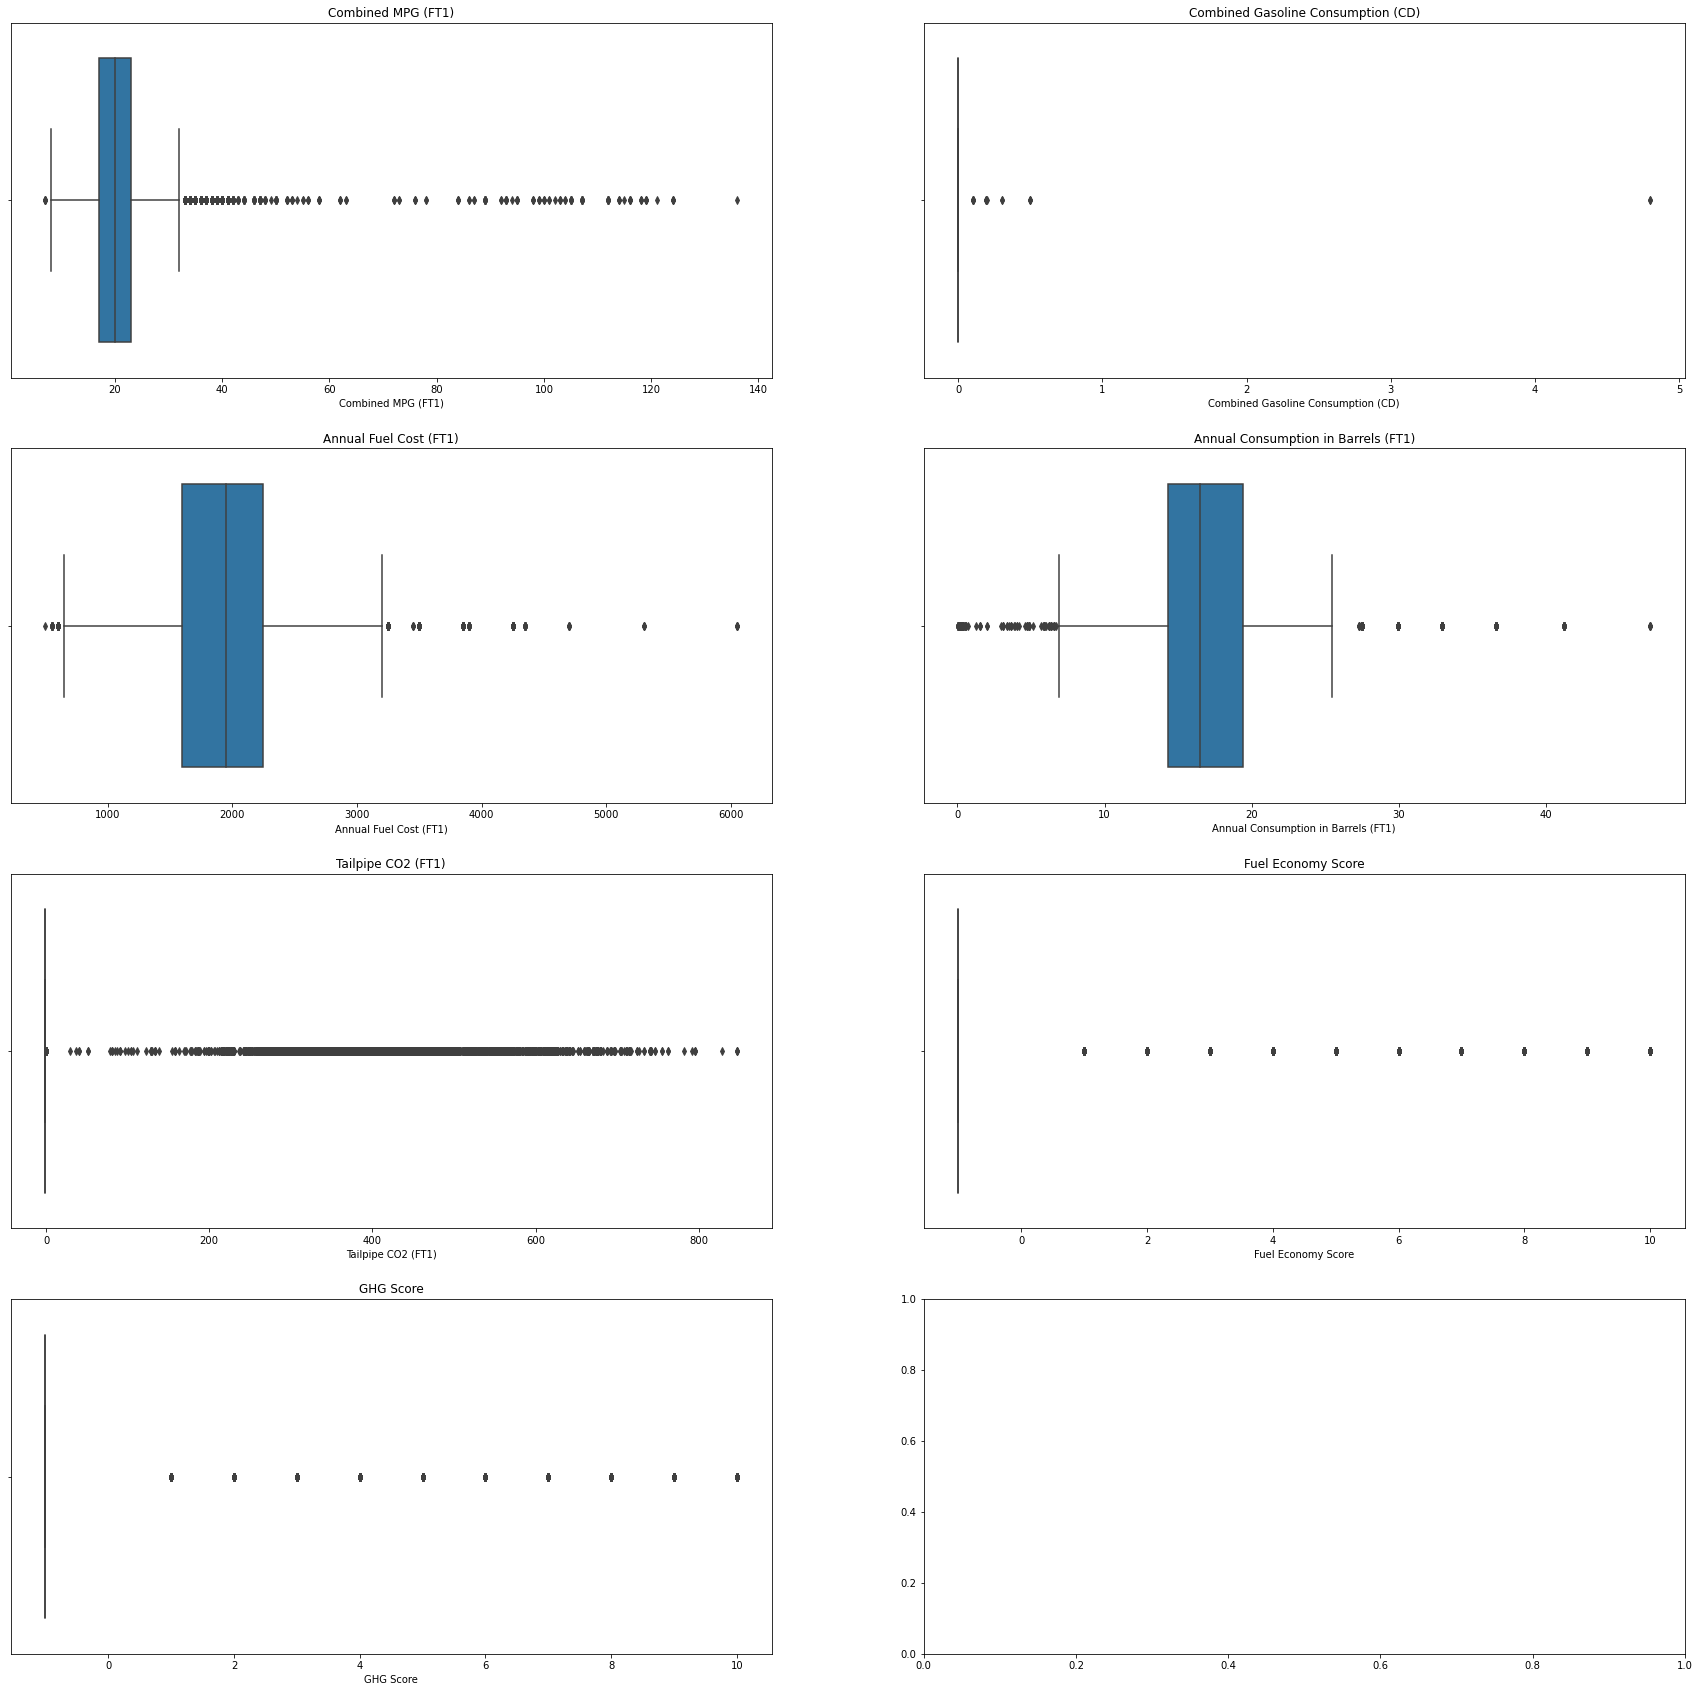

In [897]:
import math
total_row = int(math.ceil(len(response_feat)/2))
fig,ax = plt.subplots(total_row,2, figsize=(30,30))
row_counter = 0
col_counter = 0
for col in response_feat:
    if df_filtered[col].dtypes != 'object':
        sns.boxplot(df_filtered[col],ax=ax[row_counter,col_counter]).set_title(col)
        row_counter = (row_counter + 1) if col_counter >=1 else row_counter
        col_counter = (col_counter + 1) if col_counter <1 else 0

Looking at above plots, there are 4 Feature that's having an abnormality in here which are:<br>
 a. Combined Gasoline Consumption(CD)<br>
 b. Tailpipe CO2(FT1)<br>
 c. Fuel Economy Score<br>
 d. GHG Score <br>
 
<br> We will look into these features first before checking the other feature 

#### 3.6.1 Combined Gasoline Consumption(CD)

In [898]:
df_filtered.groupby(['Fuel Type']).agg({'Combined Gasoline Consumption (CD)':['count','mean']})

Combined Gasoline Consumption (CD)          
                                                         count      mean
Fuel Type                                                               
CNG                                                         60  0.000000
Diesel                                                     748  0.000000
Electricity                                                125  0.000000
Gasoline or E85                                           1140  0.000000
Gasoline or natural gas                                     20  0.000000
Gasoline or propane                                          8  0.000000
Midgrade                                                    77  0.000000
Premium                                                   9501  0.000000
Premium Gas or Electricity                                  18  0.000000
Premium and Electricity                                     25  0.499864
Premium or E85                                             121  0.000000
Regular                                                  22264  0.000000
Regular Gas and Electricity                                 20  0.038140
Regular Gas or Electricity                                   2  0.000000

Based on the Fuel type, only CNG & Electricity should have 0 values in the average. But the rest of them should have the value calculated.<br>
We can only use 45 out of 34129 entry in our dataset to create a model for this feature to predict and analyze on the carbon impact. If we want to calculate those values, we also do not have the exact formula to measure it.<br>

With all that said, we cannot create a model to predict this and we need to drop it from our data sets.




In [899]:
df_filtered.drop(['Combined Gasoline Consumption (CD)'],axis=1,inplace=True)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34129 entries, 0 to 36918
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 34129 non-null  int64  
 1   Make                                 34129 non-null  object 
 2   Class                                34129 non-null  object 
 3   Drive                                34129 non-null  object 
 4   Transmission                         34129 non-null  object 
 5   Engine Index                         34129 non-null  int64  
 6   Engine Cylinders                     34129 non-null  object 
 7   Engine Displacement                  34129 non-null  object 
 8   Turbocharger                         34129 non-null  float64
 9   Supercharger                         34129 non-null  float64
 10  Fuel Type                            34129 non-null  object 
 11  Combined MPG (FT1)          

In [900]:
#Remove it from out response Features list
response_feat.remove('Combined Gasoline Consumption (CD)')
print (response_feat)

['Combined MPG (FT1)', 'Annual Fuel Cost (FT1)', 'Annual Consumption in Barrels (FT1)', 'Tailpipe CO2 (FT1)', 'Fuel Economy Score', 'GHG Score']


#### 3.6.2 Tailpipe CO2(FT1)

In [901]:
df_filtered.groupby(['Fuel Type']).agg({'Tailpipe CO2 (FT1)':['count','mean']})

Tailpipe CO2 (FT1)            
                                         count        mean
Fuel Type                                                 
CNG                                         60   17.983333
Diesel                                     748   36.028075
Electricity                                125    0.000000
Gasoline or E85                           1140  189.821053
Gasoline or natural gas                     20   42.800000
Gasoline or propane                          8   -1.000000
Midgrade                                    77  405.233766
Premium                                   9501  119.311862
Premium Gas or Electricity                  18  120.055556
Premium and Electricity                     25  235.440000
Premium or E85                             121  329.272727
Regular                                  22264   44.622979
Regular Gas and Electricity                 20  120.700000
Regular Gas or Electricity                   2   51.000000

Looking at above data, looks like this feature has data filled in properly. Let's check if there are any entry with zero and below

In [902]:
df_tail_wrgdata = df_filtered[df_filtered['Tailpipe CO2 (FT1)']<=0].groupby(['Fuel Type'])['Tailpipe CO2 (FT1)'].count().reset_index()
df_tail_wrgdata.rename(columns={'Tailpipe CO2 (FT1)':'Total Entry'},inplace=True)

In [903]:
df_tail_wrgdata

,Fuel Type,Total Entry
0,CNG,56
1,Diesel,670
2,Electricity,125
3,Gasoline or E85,700
4,Gasoline or natural gas,18
5,Gasoline or propane,8
6,Midgrade,16
7,Premium,6859
8,Premium or E85,32
9,Regular,19618


Vehicle with Electricity does not have any exhaust pipe, which explain why it has 0 or below Tailpipe CO2. The rest of it has a tailpipe. Let's calculate how many left the data that we can use to create a model to predict this feature.

In [904]:
def use_unuse_count(ttl_unuse):
    #Get total useable data for create a model
    ttl_useable = df_filtered.shape[0] - ttl_unuse
    perc_useable =( ttl_useable / df_filtered.shape[0] ) * 100
    perc_unuse =( ttl_unuse / df_filtered.shape[0] ) * 100
    
    print (f'Total Unuseable data : {ttl_unuse} out of {df_filtered.shape[0]}')
    print (f'Perc Unuseable data : {perc_unuse}')
    print (f'Total Useable data : {ttl_useable} out of {df_filtered.shape[0]}')
    print (f'Perc Useable data : {perc_useable}')

In [905]:
use_unuse_count(df_tail_wrgdata[df_tail_wrgdata['Fuel Type'] != 'Electricity']['Total Entry'].sum())

Total Unuseable data : 27977 out of 34129
Perc Unuseable data : 81.97427407776378
Total Useable data : 6152 out of 34129
Perc Useable data : 18.025725922236223


We can still use 6K+ data to create a model. With this number, we can still use them to create a model. 
The accuracy itself still need to be measured. <br>

For now, we just need to remember to take out only selecting the data with values above 0 for all fuel types except Electricity and also take Electricity vehicle during the model creation


#### 3.6.3 Fuel Economy Score

In [906]:
df_filtered.groupby(['Fuel Type']).agg({'Fuel Economy Score':['count','mean']})

Fuel Economy Score           
                                         count       mean
Fuel Type                                                
CNG                                         60  -0.516667
Diesel                                     748  -0.165775
Electricity                                125   7.536000
Gasoline or E85                           1140   0.903509
Gasoline or natural gas                     20  -0.450000
Gasoline or propane                          8  -1.000000
Midgrade                                    77   2.558442
Premium                                   9501   0.614041
Premium Gas or Electricity                  18   7.388889
Premium and Electricity                     25   7.520000
Premium or E85                             121   3.165289
Regular                                  22264  -0.204456
Regular Gas and Electricity                 20   9.450000
Regular Gas or Electricity                   2  10.000000

Based on what I research from the google, this feature should only in between 1 to 10 (https://www.fueleconomy.gov/feg/label/learn-more-gasoline-label.shtml). based on our above data we saw that there're some entry with value below 1 or exceeding 10. Let's check how many entry with this errornous value.

In [907]:
df_fec_wrgdata = df_filtered[(df_filtered['Fuel Economy Score']<=0) | (df_filtered['Fuel Economy Score']>10)].groupby(['Fuel Type'])['Fuel Economy Score'].count().reset_index()
df_fec_wrgdata.rename(columns={'Fuel Economy Score':'Total Entry'},inplace=True)

In [908]:
df_fec_wrgdata

,Fuel Type,Total Entry
0,CNG,56
1,Diesel,670
2,Electricity,28
3,Gasoline or E85,700
4,Gasoline or natural gas,18
5,Gasoline or propane,8
6,Midgrade,16
7,Premium,6859
8,Premium Gas or Electricity,3
9,Premium or E85,32


In [909]:
use_unuse_count(df_fec_wrgdata['Total Entry'].sum())

Total Unuseable data : 28009 out of 34129
Perc Unuseable data : 82.06803598113042
Total Useable data : 6120 out of 34129
Perc Useable data : 17.931964018869586


This feature has the same statistics as the Tailpipe CO2(FT1). We can treat the same way for this feature as well

#### 3.6.4 GHG Score

In [910]:
df_filtered.groupby(['Fuel Type']).agg({'GHG Score':['count','mean']})

GHG Score           
                                count       mean
Fuel Type                                       
CNG                                60  -0.400000
Diesel                            748  -0.252674
Electricity                       125   7.536000
Gasoline or E85                  1140   0.903509
Gasoline or natural gas            20  -0.450000
Gasoline or propane                 8  -1.000000
Midgrade                           77   2.558442
Premium                          9501   0.614041
Premium Gas or Electricity         18   7.722222
Premium and Electricity            25   8.600000
Premium or E85                    121   3.165289
Regular                         22264  -0.204456
Regular Gas and Electricity        20   9.450000
Regular Gas or Electricity          2  10.000000

Based on the link that I provided in the previous features basically GHG and Fuel Economy score are the same metrics. Let's check if this is correct for this dataset or not

In [911]:
#Create new DF to store Fuel Economy Score and GHG Score only
df_compare = df_filtered[['Fuel Economy Score','GHG Score']]
conditions = [(df_filtered['Fuel Economy Score'] == df_filtered['GHG Score']),
              (df_filtered['Fuel Economy Score'] != df_filtered['GHG Score'])]
result = [True,False]
df_compare['Is Equal'] = np.select(conditions,result)
df_compare['Is Equal'].value_counts()

1    34037
0       92
Name: Is Equal, dtype: int64

In [912]:
perc_not_equal = ( df_compare[df_compare['Is Equal']!=1].shape[0] / df_compare.shape[0]) * 100
print (f'Percentage data not equal : {perc_not_equal}')

Percentage data not equal : 0.2695654721790852


There are 0.3 % data that is not equal. With this number, we can say that GHG Score is redundant data hence we can drop the features from our data

In [913]:
df_filtered.drop(['GHG Score'],axis=1,inplace=True)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34129 entries, 0 to 36918
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 34129 non-null  int64  
 1   Make                                 34129 non-null  object 
 2   Class                                34129 non-null  object 
 3   Drive                                34129 non-null  object 
 4   Transmission                         34129 non-null  object 
 5   Engine Index                         34129 non-null  int64  
 6   Engine Cylinders                     34129 non-null  object 
 7   Engine Displacement                  34129 non-null  object 
 8   Turbocharger                         34129 non-null  float64
 9   Supercharger                         34129 non-null  float64
 10  Fuel Type                            34129 non-null  object 
 11  Combined MPG (FT1)          

In [914]:
#Remove it from out response Features list
response_feat.remove('GHG Score')
print (response_feat)

['Combined MPG (FT1)', 'Annual Fuel Cost (FT1)', 'Annual Consumption in Barrels (FT1)', 'Tailpipe CO2 (FT1)', 'Fuel Economy Score']


Now all 4 abnormality features has been checked. Let's check the other 3 features.

#### 3.6.5 Combined MPG (FT1)

<AxesSubplot:xlabel='Combined MPG (FT1)'>

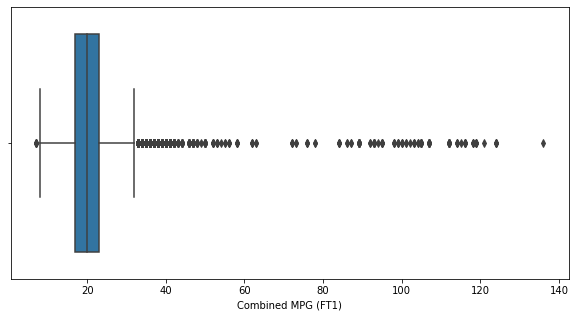

In [915]:
fig,ax = plt.subplots(figsize = (10,5))
sns.boxplot(df_filtered['Combined MPG (FT1)'],ax=ax)

There are outliers int this feature with value 40+ above. Let's check the standard deviation value

In [916]:
def std_deviation(df,feature):
    std = df[feature].std()
    std_max = df[feature].mean() + (3*std)
    std_min = df[feature].mean() - (3*std)
    return {'std' : std, 'std_min':std_min, 'std_max':std_max}

In [917]:
std = std_deviation(df_filtered,'Combined MPG (FT1)')
print(std)

{'std': 6.891898216943299, 'std_min': -0.31216217112055844, 'std_max': 41.03922713053923}


For this features the value should not below -0.3 and not exceeding 41.0392. Let's check how many rows affected based on the fuel Type

In [918]:
def get_deviation_data(df,feature):
    std = std_deviation(df,feature)
    df_err = df[(df[feature]< std['std_min']) | (df[feature]> std['std_max'])]
    return df_err.groupby(['Fuel Type'])[feature].count().reset_index().rename(columns={feature:'Total Outliers Entry'})

In [919]:
df_mpg_err = get_deviation_data(df_filtered,'Combined MPG (FT1)')
df_mpg_err

,Fuel Type,Total Outliers Entry
0,Electricity,120
1,Premium,4
2,Regular,87
3,Regular Gas and Electricity,7
4,Regular Gas or Electricity,2


In [920]:
use_unuse_count(df_mpg_err['Total Outliers Entry'].sum())

Total Unuseable data : 220 out of 34129
Perc Unuseable data : 0.6446130856456387
Total Useable data : 33909 out of 34129
Perc Useable data : 99.35538691435436


These outliers maybe affected by the vehicle that are not using a fossil fuel (Regular, Premium, Diesel'). Let's check the total count for vehicle that is not using fossil fuel. If the result is match with above data, then we need to recalculate the deviation by excluding the fuel type that having the same value

In [921]:
df_nonfosil = df_filtered[~df_filtered['Fuel Type'].isin(['Regular', 'Premium', 'Diesel'])].groupby(['Fuel Type'])['Combined MPG (FT1)'].count().reset_index()

In [922]:
df_nonfosil = df_nonfosil[df_nonfosil['Fuel Type'].isin(df_mpg_err['Fuel Type'].tolist())]

In [923]:
df_nonfosil.rename(columns={'Combined MPG (FT1)':'Total Entry in dataset'},inplace=True)

In [924]:
#Set Fuel type as index
df_nonfosil.set_index('Fuel Type',inplace=True)

In [925]:
df_nonfosil

,Total Entry in dataset
Fuel Type,
Electricity,125
Regular Gas and Electricity,20
Regular Gas or Electricity,2


In [926]:
df_mpg_err = df_mpg_err.join(df_nonfosil,how='inner',on='Fuel Type')

In [927]:
df_mpg_err

,Fuel Type,Total Outliers Entry,Total Entry in dataset
0,Electricity,120,125
3,Regular Gas and Electricity,7,20
4,Regular Gas or Electricity,2,2


We can exclude "Electricity" and "Regular Gas or Electricity" fuel type in the data removal since they are almost the same in terms of total data compared to the entire entry in dataset. Now we just removed the 7 entries of "Regular Gas and Electricity" vehicle

In [928]:
#Retrieve the outliers data
def get_outliers_data(df,fuel_type, features):
    std = std_deviation(df,features)
    df_excl = df[df['Fuel Type'].isin(fuel_type)]
    return df_excl[(df_excl[features] < std['std_min']) | (df_excl[features] > std['std_max'])]


In [929]:
df_excl = get_outliers_data(df_filtered,['Regular Gas and Electricity'],'Combined MPG (FT1)')
df_excl.shape[0]

7

In [930]:
#Remove data from our data set
df_filtered.drop(df_excl.index,axis=0,inplace=True)

In [931]:
data_statistics()

Total data Removed: 3991 out of 38113
Remaining Data: 34122
Percentage Data that are still retained: 89.52850733345578


#### 3.6.6 Annual Fuel Cost (FT1)

<AxesSubplot:xlabel='Annual Fuel Cost (FT1)'>

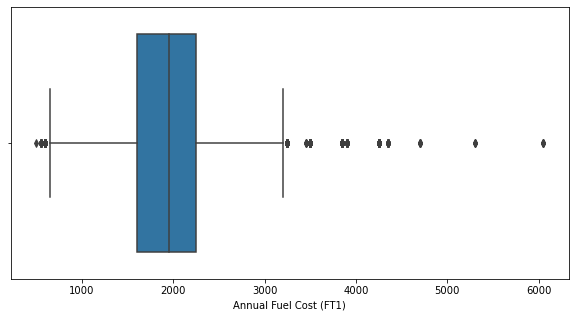

In [932]:
focus_features = 'Annual Fuel Cost (FT1)'
fig,ax = plt.subplots(figsize = (10,5))
sns.boxplot(df_filtered[focus_features],ax=ax)

Check for Standard deviation

In [933]:
print(std_deviation(df_filtered,focus_features))

{'std': 526.2159371036591, 'std_min': 381.4263344014662, 'std_max': 3538.721957023421}


Get Outliers

In [934]:
df_dev = get_deviation_data(df_filtered,focus_features)

In [935]:
df_dev

,Fuel Type,Total Outliers Entry
0,Premium,191
1,Regular,39


In [936]:
total_entry = df_dev['Total Outliers Entry'].sum()
print(f'Total Outliers entry : {total_entry}')

Total Outliers entry : 230


Remove outliers

In [937]:
#Get Outliers data
df_excl = get_outliers_data(df_filtered,df_dev['Fuel Type'].tolist(),focus_features)
df_excl.shape[0]

230

In [938]:
df_filtered.drop(df_excl.index,axis=0,inplace=True)

In [939]:
data_statistics()

Total data Removed: 4221 out of 38113
Remaining Data: 33892
Percentage Data that are still retained: 88.9250387007058


#### 3.6.7 Annual consumption in Barrels (FT1)

<AxesSubplot:xlabel='Annual Consumption in Barrels (FT1)'>

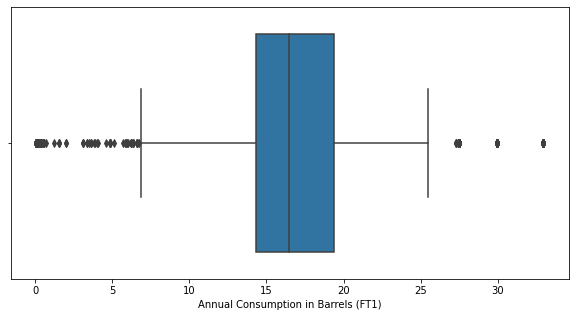

In [940]:
focus_features = 'Annual Consumption in Barrels (FT1)'
fig,ax = plt.subplots(figsize = (10,5))
sns.boxplot(df_filtered[focus_features],ax=ax)

Check for Standard deviation

In [941]:
print(std_deviation(df_filtered,focus_features))

{'std': 4.30908322329418, 'std_min': 4.334934807858414, 'std_max': 30.18943414762349}


Get Outliers

In [942]:
df_dev = get_deviation_data(df_filtered,focus_features)

In [943]:
df_dev

,Fuel Type,Total Outliers Entry
0,CNG,60
1,Electricity,125
2,Gasoline or natural gas,1
3,Premium Gas or Electricity,13
4,Regular,61
5,Regular Gas and Electricity,4
6,Regular Gas or Electricity,2


In [944]:
total_entry = df_dev['Total Outliers Entry'].sum()
print(f'Total Outliers entry : {total_entry}')

Total Outliers entry : 266


Remove outliers

In [945]:
#Get Outliers data
df_excl = get_outliers_data(df_filtered,df_dev['Fuel Type'].tolist(),focus_features)
df_excl.shape[0]

266

In [946]:
df_filtered.drop(df_excl.index,axis=0,inplace=True)

In [947]:
data_statistics()

Total data Removed: 4487 out of 38113
Remaining Data: 33626
Percentage Data that are still retained: 88.22711410804712


# 4 End result

Here are statistics of the data that we can use to create our model in here

In [948]:
data_statistics()

Total data Removed: 4487 out of 38113
Remaining Data: 33626
Percentage Data that are still retained: 88.22711410804712


On top of that we also removed 2 features that previously we picked up in the initial feature selection step:<br>
a. Combined Gasoline Consumption(CD), Only 45 entry are valid<br> 
b. GHG Score, Equivalent to Fuel Economy score

In [949]:
#Export data to new CSV
df_filtered.to_csv('./Datasets/database_cleaned.csv',index=False)

In [950]:
df_test_load_csv = pd.read_csv('./Datasets/database_cleaned.csv')
df_test_load_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33626 entries, 0 to 33625
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 33626 non-null  int64  
 1   Make                                 33626 non-null  object 
 2   Class                                33626 non-null  object 
 3   Drive                                33626 non-null  object 
 4   Transmission                         33626 non-null  object 
 5   Engine Index                         33626 non-null  int64  
 6   Engine Cylinders                     33626 non-null  float64
 7   Engine Displacement                  33626 non-null  float64
 8   Turbocharger                         33626 non-null  float64
 9   Supercharger                         33626 non-null  float64
 10  Fuel Type                            33626 non-null  object 
 11  Combined MPG (FT1)          

In [951]:
df_test_load_csv.isna().sum()

Year                                   0
Make                                   0
Class                                  0
Drive                                  0
Transmission                           0
Engine Index                           0
Engine Cylinders                       0
Engine Displacement                    0
Turbocharger                           0
Supercharger                           0
Fuel Type                              0
Combined MPG (FT1)                     0
Annual Fuel Cost (FT1)                 0
Annual Consumption in Barrels (FT1)    0
Tailpipe CO2 (FT1)                     0
Fuel Economy Score                     0
Drive Type                             0
Transmission Type                      0
dtype: int64

# 6 Correlation

Get list of features with object type

In [952]:
obj_feat = [feature for feature in df_test_load_csv.axes[1] if df_test_load_csv[feature].dtypes == 'object']
print (obj_feat)

['Make', 'Class', 'Drive', 'Transmission', 'Fuel Type', 'Drive Type', 'Transmission Type']


Start ordinal encode in order to get corellation

In [953]:
from category_encoders import OrdinalEncoder

In [954]:
encoder = OrdinalEncoder(cols = obj_feat,return_df = True)
df_encoded = encoder.fit_transform(df_test_load_csv)
df_encoded.head()

,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Combined MPG (FT1),Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1),Tailpipe CO2 (FT1),Fuel Economy Score,Drive Type,Transmission Type
0,1984,1,1,1,1,1830,4.0,2.5,0.0,0.0,1,17,2050,19.388824,-1,-1,1,1
1,1984,1,1,1,1,1880,4.0,2.5,0.0,0.0,1,17,2050,19.388824,-1,-1,1,1
2,1984,1,1,1,1,1831,6.0,4.2,0.0,0.0,1,13,2700,25.354615,-1,-1,1,1
3,1984,1,1,1,1,1881,6.0,4.2,0.0,0.0,1,13,2700,25.354615,-1,-1,1,1
4,1984,2,2,2,1,1524,6.0,4.2,0.0,0.0,1,17,2050,19.388824,-1,-1,2,1


<AxesSubplot:>

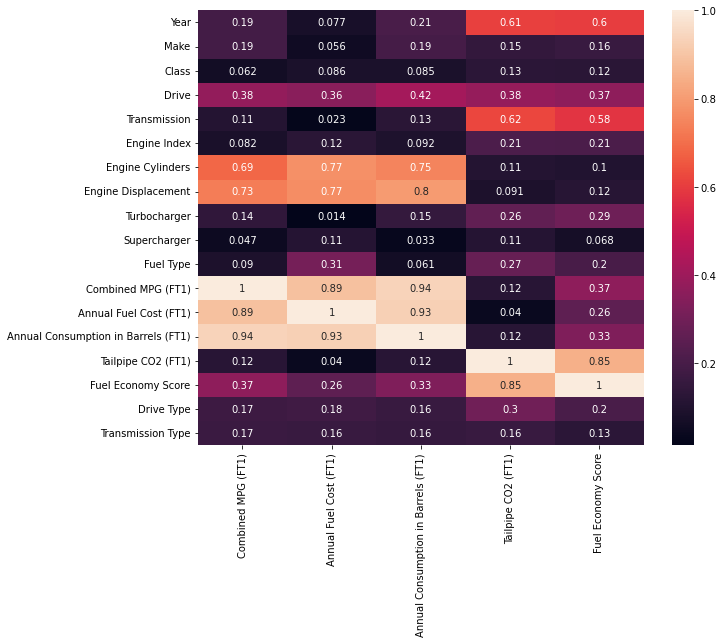

In [955]:
#Get Correlation for response Variable
df_corr = df_encoded.corr()
df_corr = df_corr[response_feat]

#Abs correlation value
for feat in response_feat:
    df_corr[feat] = np.abs(df_corr[feat])

#Draw Heat Map
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_corr[response_feat],ax=ax,annot=True)
    


Get top 5 correlated predictor for each response feature

In [956]:
# Get top 5 features with the highest correlation for each response variable
for resp in response_feat:
    df_corr_1 = df_corr[[resp]]
    #Take from the 2nd entry, since the first will be always its own feature
    print (f'{resp}:\n{df_corr_1.sort_values(by=resp,ascending=False)[1:6].to_dict()[resp]}\n') 

Combined MPG (FT1):
{'Annual Consumption in Barrels (FT1)': 0.9350182251593544, 'Annual Fuel Cost (FT1)': 0.889252238280876, 'Engine Displacement': 0.7324922587377135, 'Engine Cylinders': 0.6864486953437585, 'Drive': 0.37817105053253236}

Annual Fuel Cost (FT1):
{'Annual Consumption in Barrels (FT1)': 0.9298536978937915, 'Combined MPG (FT1)': 0.889252238280876, 'Engine Cylinders': 0.7749742910839488, 'Engine Displacement': 0.7677330978253267, 'Drive': 0.3550182120079663}

Annual Consumption in Barrels (FT1):
{'Combined MPG (FT1)': 0.9350182251593544, 'Annual Fuel Cost (FT1)': 0.9298536978937915, 'Engine Displacement': 0.7967522301535163, 'Engine Cylinders': 0.7460117760841126, 'Drive': 0.4154053438503202}

Tailpipe CO2 (FT1):
{'Fuel Economy Score': 0.8469044941851973, 'Transmission': 0.6222976306936099, 'Year': 0.6100221404260906, 'Drive': 0.3806007211239727, 'Drive Type': 0.29691379032914617}

Fuel Economy Score:
{'Tailpipe CO2 (FT1)': 0.8469044941851973, 'Year': 0.6022099390977731, '

Looking at above correlation, the response feature are highly correlated with each other. Let's take filter out those and only take the highest correlation based on predictor features only

In [957]:
for resp in response_feat:
    df_corr_1 = df_corr[[resp]]
    print (f'{resp}:\n{df_corr_1[df_corr_1.index.isin(predictor_feat)].sort_values(by=resp,ascending=False)[0:5].to_dict()[resp]}\n')

Combined MPG (FT1):
{'Engine Displacement': 0.7324922587377135, 'Engine Cylinders': 0.6864486953437585, 'Drive': 0.37817105053253236, 'Make': 0.18922371172755015, 'Year': 0.18815459129628037}

Annual Fuel Cost (FT1):
{'Engine Cylinders': 0.7749742910839488, 'Engine Displacement': 0.7677330978253267, 'Drive': 0.3550182120079663, 'Fuel Type': 0.307165321686854, 'Engine Index': 0.12375780333157324}

Annual Consumption in Barrels (FT1):
{'Engine Displacement': 0.7967522301535163, 'Engine Cylinders': 0.7460117760841126, 'Drive': 0.4154053438503202, 'Year': 0.20610287040819614, 'Make': 0.1933817336860611}

Tailpipe CO2 (FT1):
{'Transmission': 0.6222976306936099, 'Year': 0.6100221404260906, 'Drive': 0.3806007211239727, 'Fuel Type': 0.2746244389243499, 'Turbocharger': 0.26147740416896326}

Fuel Economy Score:
{'Year': 0.6022099390977731, 'Transmission': 0.5838034541860558, 'Drive': 0.3656975680775613, 'Turbocharger': 0.2947708485011728, 'Engine Index': 0.21044952617835153}



From this correlation we can conclude 2 thing:<br>
<t>1. For Fuel consumption related features (Combined MPG, Annual Fuel Cost, and Annual Consumption), the Engine and Drive features are highly correlated.<br>
<t>2. For Carbon Foot print related Feature (Tailpipe CO2 (FT1) and Fuel Economy score), the Year and Transmission are highly correlated

For the other 2 features that we created previously to simplify the Drive (Drive Type) and Transmission(Transmission type) turns out are decreased the correlation with the response features compared to their original values. We will used the original values instead of the simplified version.

# 7 Basic Analysis

## 7.1 Engine & Fuel Consumption

Text(0.5, 1.0, 'Engine Displacement x Annual Fuel Cost')

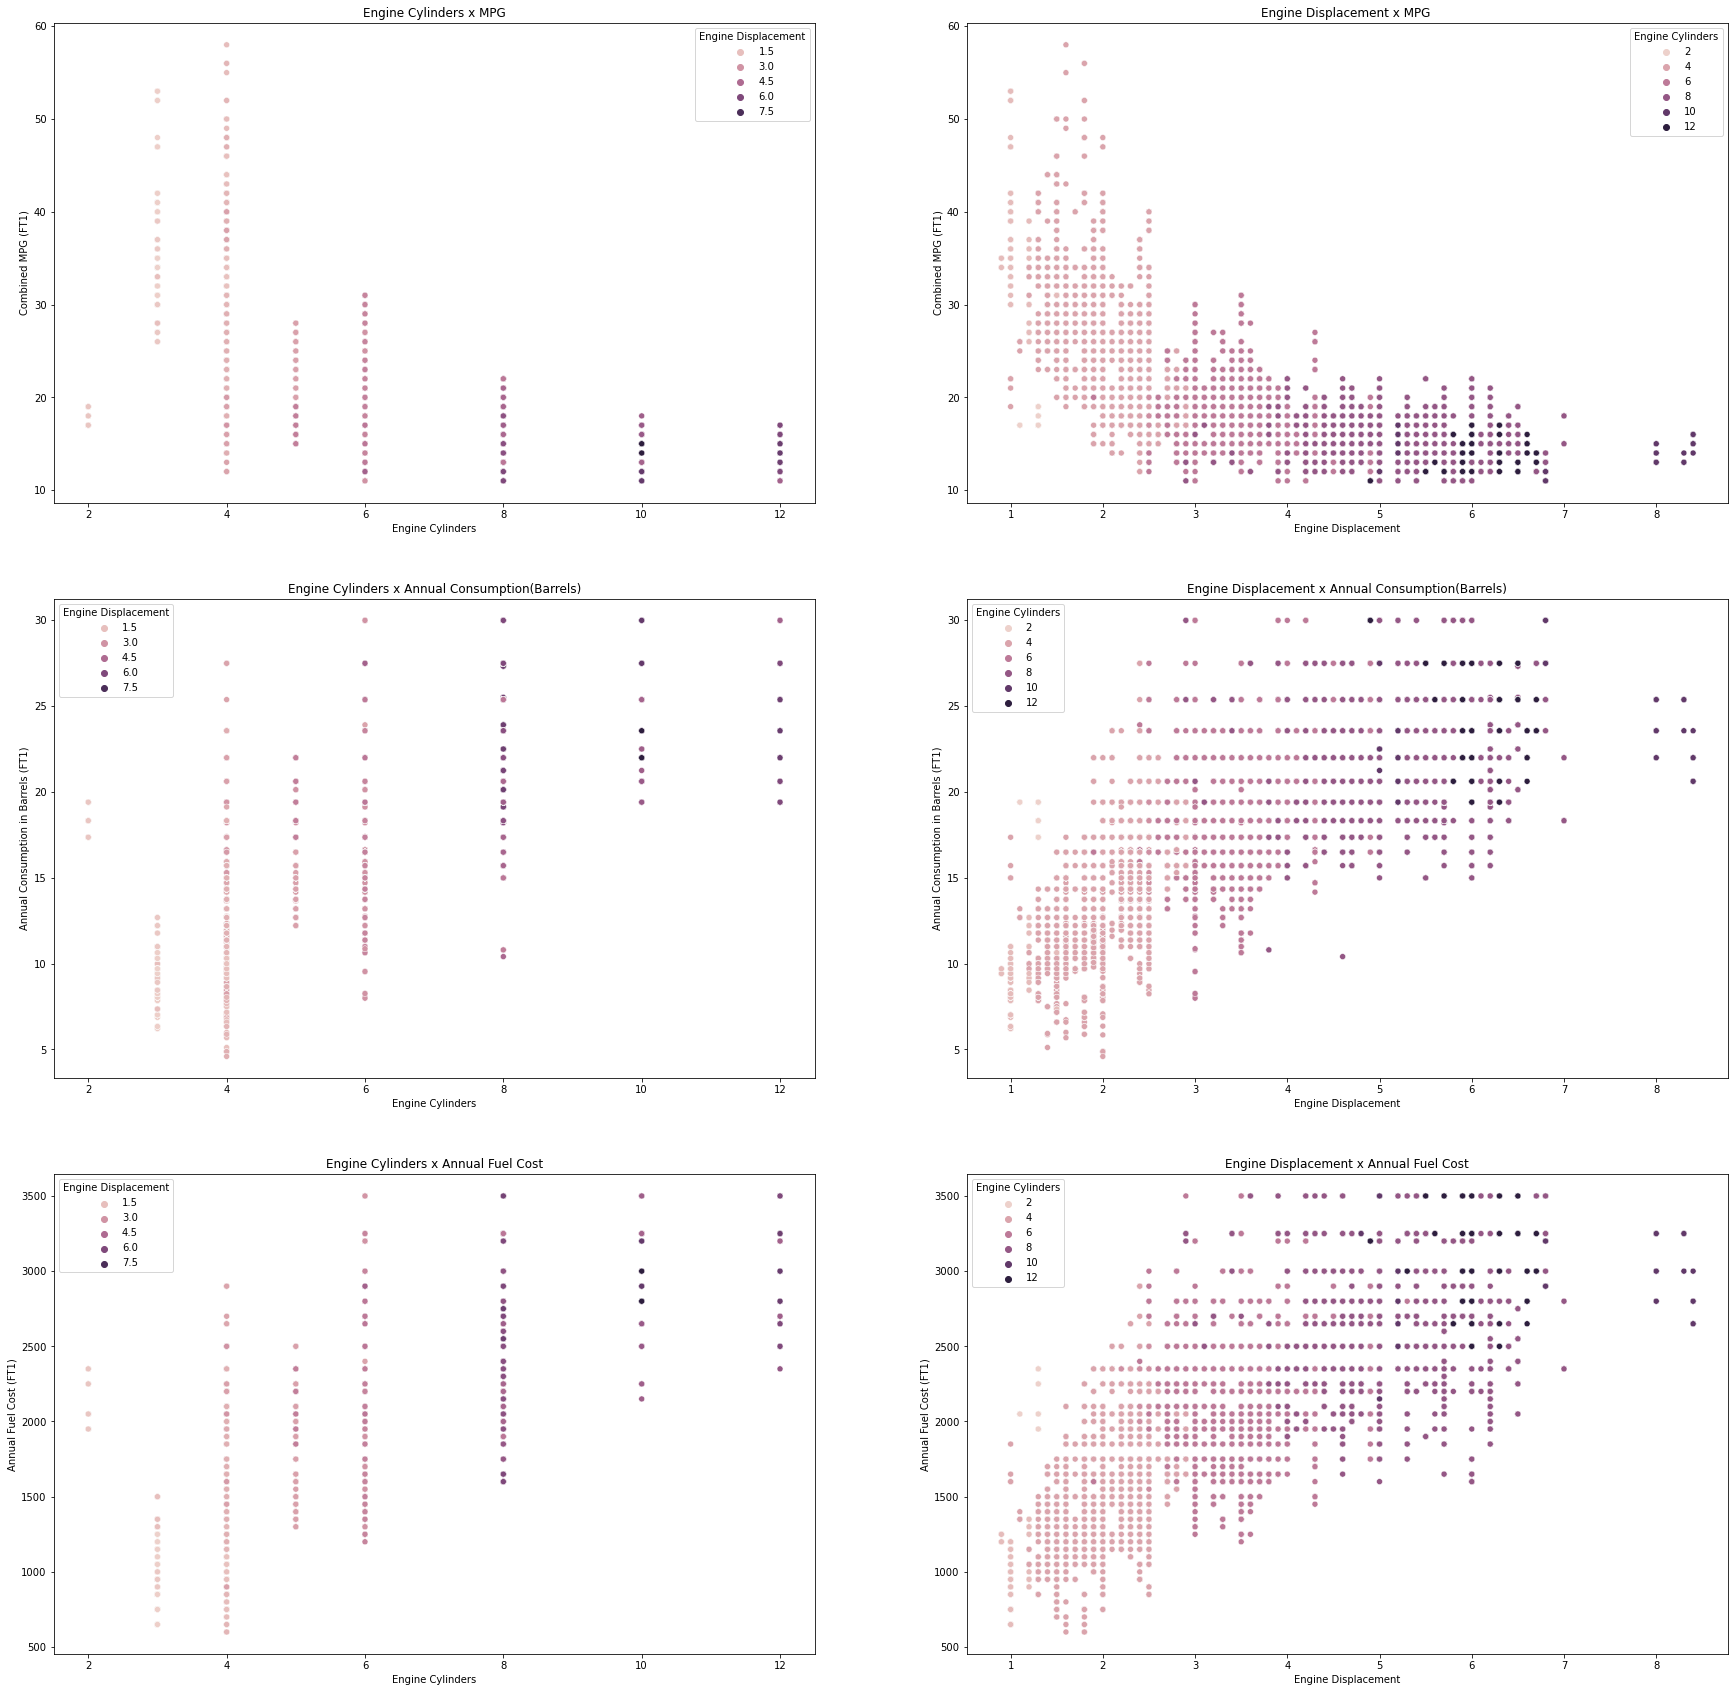

In [958]:
fig,ax = plt.subplots(3,2,figsize=(30,30))
sns.scatterplot(data=df_test_load_csv,x='Engine Cylinders', y='Combined MPG (FT1)',hue='Engine Displacement',ax=ax[0,0]).set_title('Engine Cylinders x MPG')
sns.scatterplot(data=df_test_load_csv,x='Engine Displacement', y='Combined MPG (FT1)',hue='Engine Cylinders',ax=ax[0,1]).set_title('Engine Displacement x MPG ')
sns.scatterplot(data=df_test_load_csv,x='Engine Cylinders', y='Annual Consumption in Barrels (FT1)',hue='Engine Displacement',ax=ax[1,0]).set_title('Engine Cylinders x Annual Consumption(Barrels)')
sns.scatterplot(data=df_test_load_csv,x='Engine Displacement', y='Annual Consumption in Barrels (FT1)',hue='Engine Cylinders',ax=ax[1,1]).set_title('Engine Displacement x Annual Consumption(Barrels)')
sns.scatterplot(data=df_test_load_csv,x='Engine Cylinders', y='Annual Fuel Cost (FT1)',hue='Engine Displacement',ax=ax[2,0]).set_title('Engine Cylinders x Annual Fuel Cost')
sns.scatterplot(data=df_test_load_csv,x='Engine Displacement', y='Annual Fuel Cost (FT1)',hue='Engine Cylinders',ax=ax[2,1]).set_title('Engine Displacement x Annual Fuel Cost')

Based on the chart we can conclude :<br>
a. The engine with 6 cylinder above will consume more fuel.<br>
b. For 6 and below cylinder engine, the fuel consumption tends to be higher when the engine displacement is small.

## 7.2 Carbon footprint contribute by car each year

In [959]:
def plot_carbon(df):
    fig,ax = plt.subplots(1,2,figsize=(30,10))
    sns.lineplot(data=df,x='Year', y='Tailpipe CO2 (FT1)',hue='Transmission Type',ax=ax[0]).set_title('Tailpipe CO2')
    sns.lineplot(data=df,x='Year', y='Fuel Economy Score',hue='Transmission Type',ax=ax[1]).set_title('Fuel Economy Score')

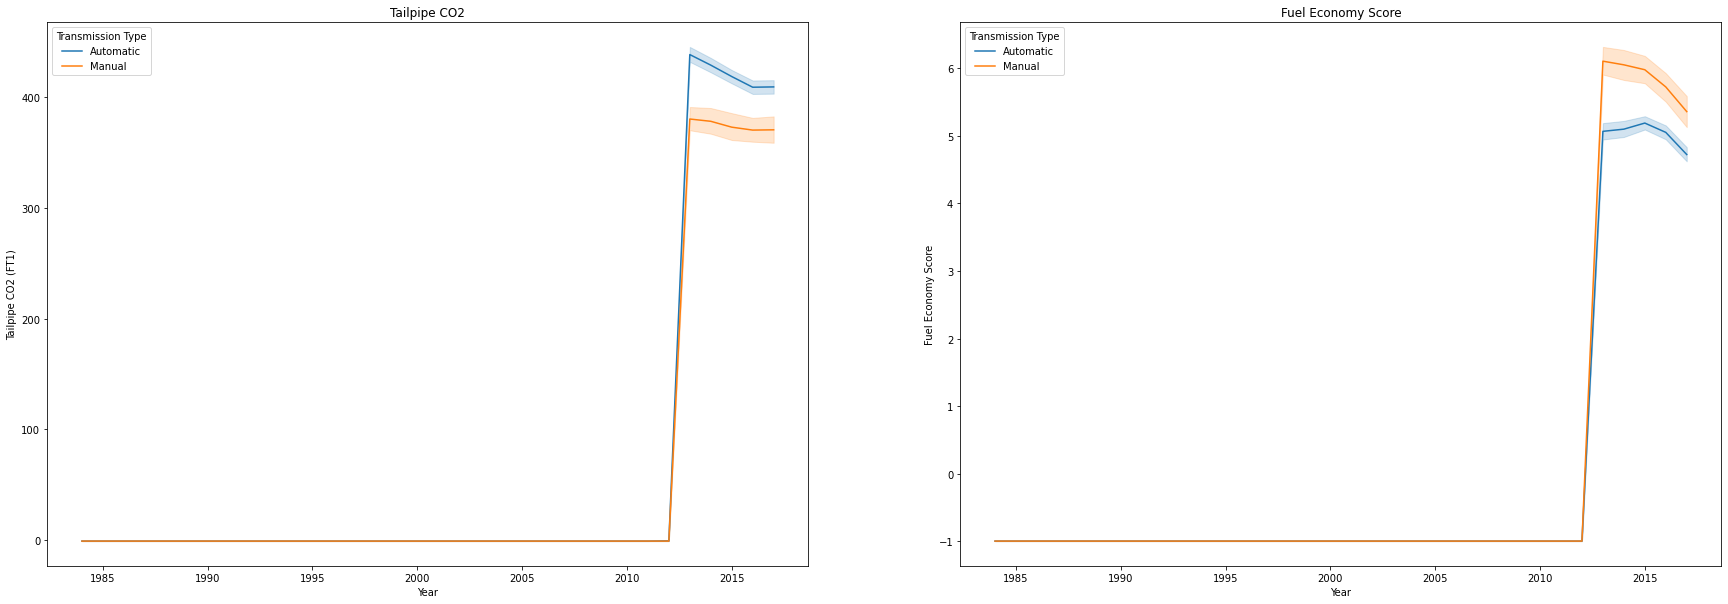

In [960]:
plot_carbon(df_test_load_csv)

As mentioned during the Outliers checking, there are a lot of entry are not having this information. If we look in the plot, vehicle made in 2013 below did not have this information. Let's check if this conclusion is true or not

In [961]:
df_test_load_csv[df_test_load_csv['Tailpipe CO2 (FT1)']>0].groupby(['Year'])['Tailpipe CO2 (FT1)'].count().reset_index()

,Year,Tailpipe CO2 (FT1)
0,2012,1
1,2013,1151
2,2014,1177
3,2015,1246
4,2016,1214
5,2017,1201


In [962]:
df_test_load_csv[df_test_load_csv['Fuel Economy Score']>0].groupby(['Year'])['Fuel Economy Score'].count().reset_index()

,Year,Fuel Economy Score
0,2013,1151
1,2014,1177
2,2015,1246
3,2016,1214
4,2017,1201


Since we only have more data starting from 2013, Let's replot the data from 2013 onwards

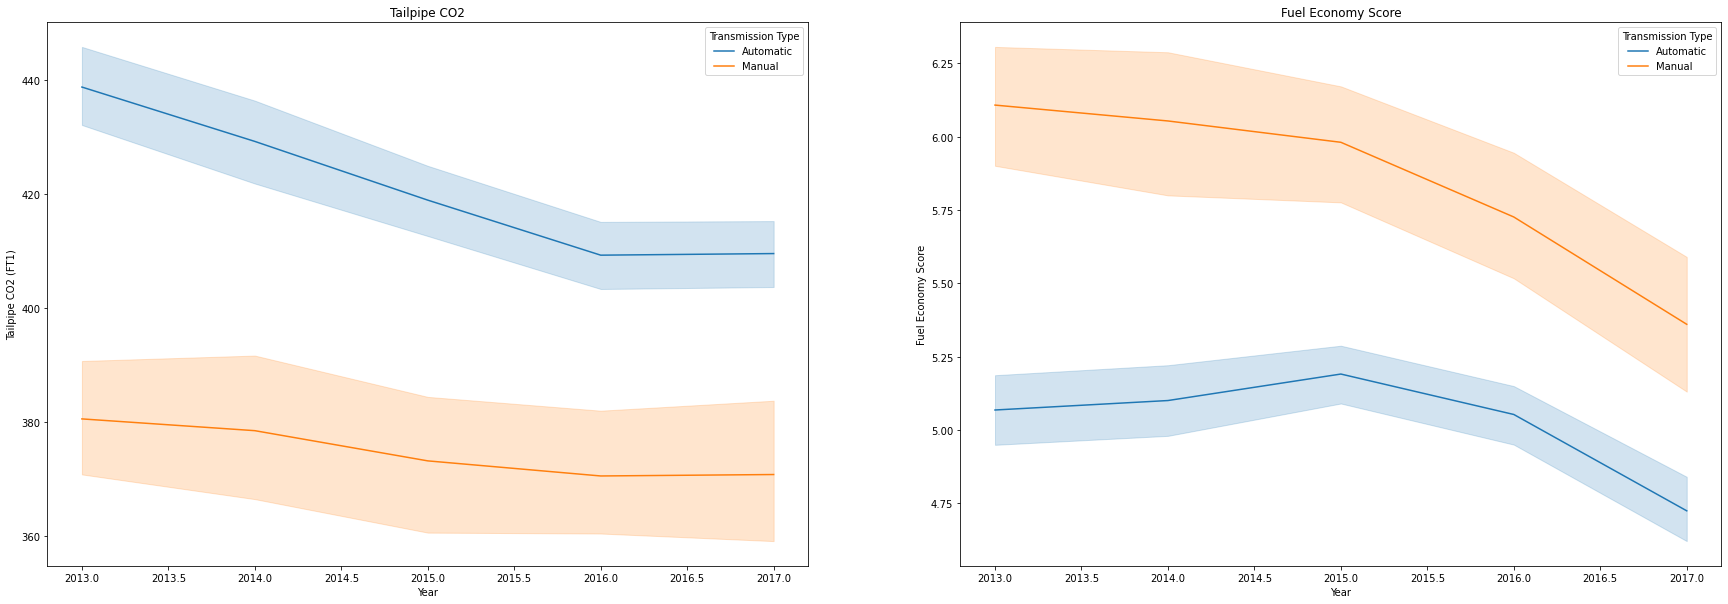

In [963]:
plot_carbon(df_test_load_csv[df_test_load_csv['Year']>=2013])

<AxesSubplot:xlabel='Fuel Economy Score', ylabel='Tailpipe CO2 (FT1)'>

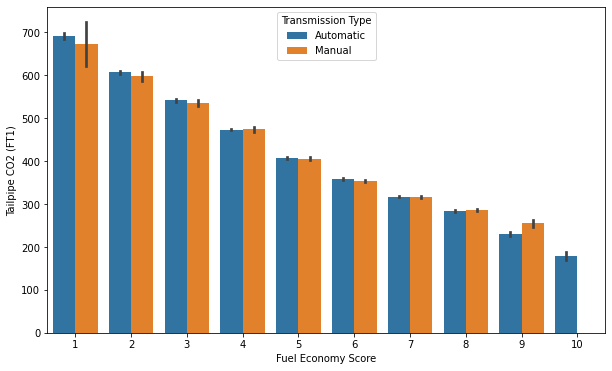

In [964]:
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_test_load_csv[df_test_load_csv['Year']>=2013],x='Fuel Economy Score', y='Tailpipe CO2 (FT1)', hue='Transmission Type',ax=ax)

Based on above plot we can conclude:<br>
a. Car with automatic transmission tend to produced more pollution than manual <br>
b. There are huge deviation detected in Manual Car<br>
c. The car polution reduced every year and the trend become stagnated from 2016 onwards <br>
d. Although each year the polution reduced, but the Fuel economy score get worst (Best score is in 2015). <br> 
e. For fuel economy score 9, there's a big gap between Automatic and Manual car.
f. There're no manual car with Fuel Economy score 10.


## 7.3 Car Maker & Efficiency

#### To do : Need to provide analysis methodology and split data in min, avg, max

We will compare MPG, f each automaker to determine which Car maker produced the most efficient and most ineffecient cars. We will compare based on:<br>
1. Avg. MPG and Annual Fuel cost for each Automakers <br>
<t> Get the Avg MPG for each automakers then we will take 10 of the highest and lowest efficiency<br>
2. MPG and Annual Fuel cost for Automakers that have largest volume of released car.<br>
<t> We will get first the first 20 Automaker that produced the most cars
    and calculate Avg.MPG for each Automaker. From this data we will only take 10 data with the highest or lowest efficiency or MPG


In [965]:
#Prepare Aggregated Data First
df_car_maker = df_test_load_csv.groupby(['Make']).agg({'Combined MPG (FT1)':['count','mean'],'Fuel Economy Score':['mean']}).reset_index()
df_car_maker.columns = [col[0]+'_'+col[1] for col in df_car_maker.columns.values ]
df_car_maker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Make_                     123 non-null    object 
 1   Combined MPG (FT1)_count  123 non-null    int64  
 2   Combined MPG (FT1)_mean   123 non-null    float64
 3   Fuel Economy Score_mean   123 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.0+ KB


In [966]:
df_car_maker.rename(columns={'Make_':'Maker','Combined MPG (FT1)_count':'Total Car','Combined MPG (FT1)_mean' : 'Avg.MPG', 'Fuel Economy Score_mean' : 'Avg.Fuel Economy Score'},inplace=True)
df_car_maker.head()

,Maker,Total Car,Avg.MPG,Avg.Fuel Economy Score
0,AM General,6,14.833333,-1.000000
1,ASC Incorporated,1,16.000000,-1.000000
2,Acura,302,21.450331,0.456954
3,Alfa Romeo,45,20.022222,-0.066667
4,American Motors Corporation,19,17.631579,-1.000000


Define some functions to help us plot the data later 

In [967]:
def plot_efficient_car(car_maker,ax,title):
    #Scatter plot to look for the distribution of the Car
    sizes = (min(df_test_load_csv['Annual Consumption in Barrels (FT1)'])*20,max(df_test_load_csv['Annual Consumption in Barrels (FT1)'])*20 )
    sns.scatterplot(data= df_test_load_csv[df_test_load_csv['Make'].isin(car_maker)],x='Annual Fuel Cost (FT1)',y='Combined MPG (FT1)',hue='Make',ax=ax,sizes=sizes,size='Annual Consumption in Barrels (FT1)').set_title(title)

In [968]:
def plot_car_maker_avg_mpg(df,ax,title):
    #Plot Avg.MPG for each automaker
    sns.barplot(data=df,x='Avg.MPG',y='Maker',ax=ax).set_title(title)

In [969]:
#Sort to get the highest MPG Car Maker
def car_eff_plot(mpg_sort,title):
    fig,ax = plt.subplots(2,2,figsize=(20,20))
    #1st plot most Efficient/Inefficient Car Automaker. This is based on AVG MPG for each automaker
    df_car_maker.sort_values(by='Avg.MPG',ascending=mpg_sort,inplace=True)
    plot_car_maker_avg_mpg(df_car_maker.head(10),ax[0,0],title + ' Car Makers by Avg.MPG')
    #2nd Distribution plot of MPG, Annual Fuel Cost and Annual Consumption for each automaker in the 1st plot 
    plot_efficient_car(df_car_maker.head(10)['Maker'],ax[0,1],title + ' Car Makers by total distributions')
    
    #3rd Plot  Most Efficient/Inefficient Car Automaker that produced the most cars, We will get first the first 20 Automaker that produced the most cars
    #and calculate Avg.MPG for each Automaker
    df_most_cars = df_car_maker.sort_values(by='Total Car',ascending=False)
    df_most_cars = df_most_cars.head(20)
    df_most_cars.sort_values(by='Avg.MPG',ascending=mpg_sort,inplace=True)
    #Display only 10 Automaker from the list
    plot_car_maker_avg_mpg(df_most_cars.head(10),ax[1,0],title + ' Car Makers with the highest produced car by Avg.MPG')
    
    #4th Distribution plot of MPG, Annual Fuel Cost and Annual Consumption for each automaker in the 3rd plot 
    plot_efficient_car(df_most_cars.head(10)['Maker'],ax[1,1],title + ' Car Makers with the highest produced car by total distributions')

#### 7.3.1 Most Efficient car

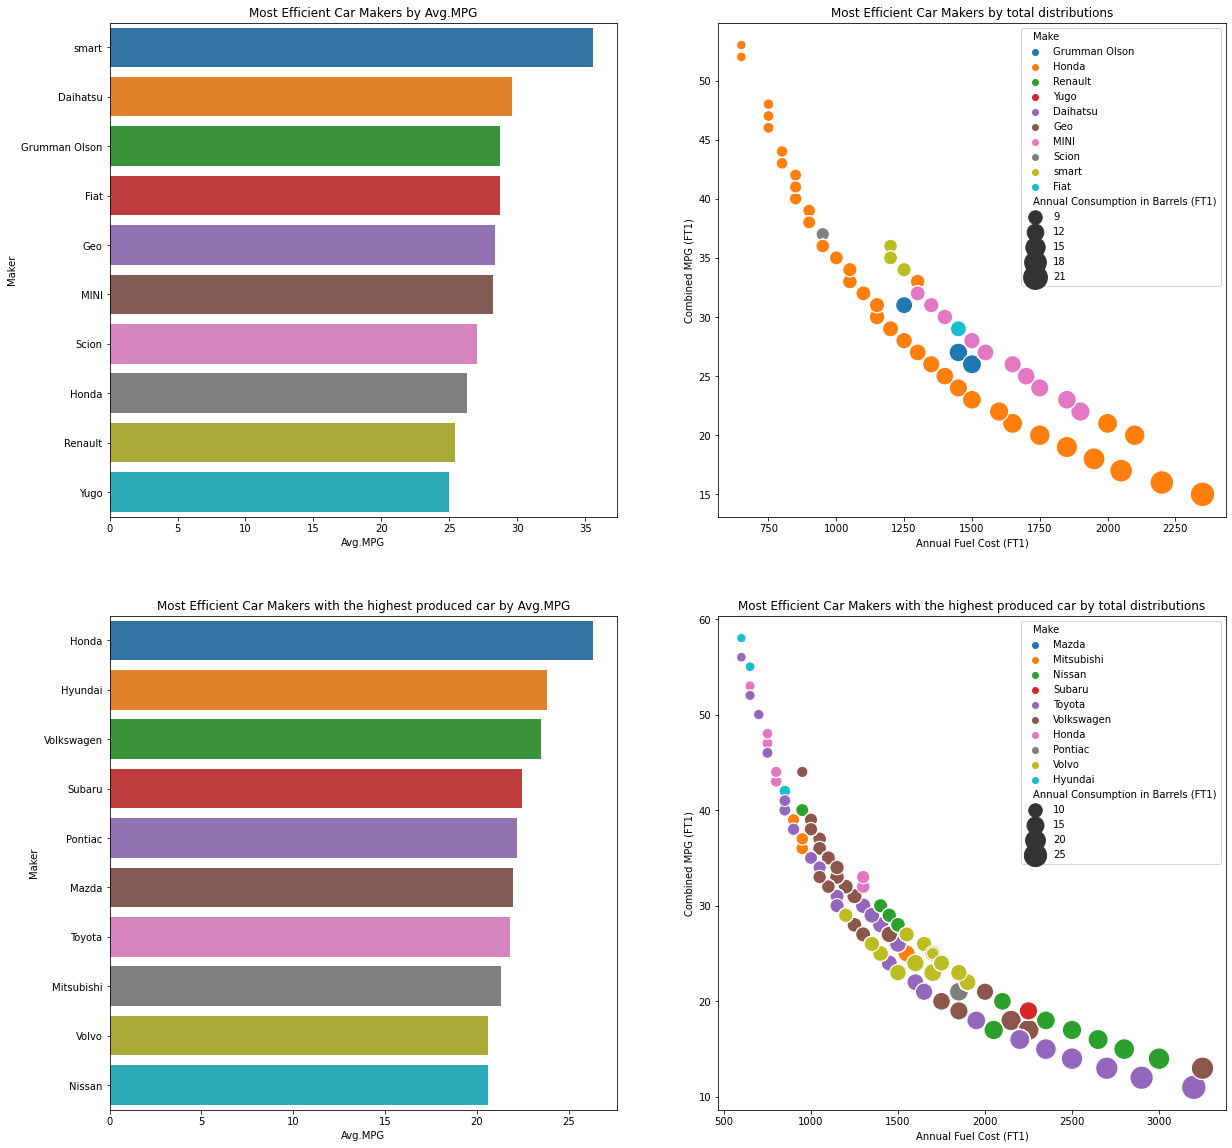

In [970]:
car_eff_plot(False,'Most Efficient')

Based on above charts we can conclude: <br>
a. Honda produced the most efficient car (Lowest Annual Fuel Cost & Annual consumption with the highest MPG).<br>
b. Although Volkswagen is at the 3rd position in the 3rd plot, it produced a lot of Efficient car in the data set comparing to Hyundai.<br>
c. Smart although by overall Average having the highest MPG, it only has 3 cars in the data set<br>


#### 7.3.1 Most Inefficient car

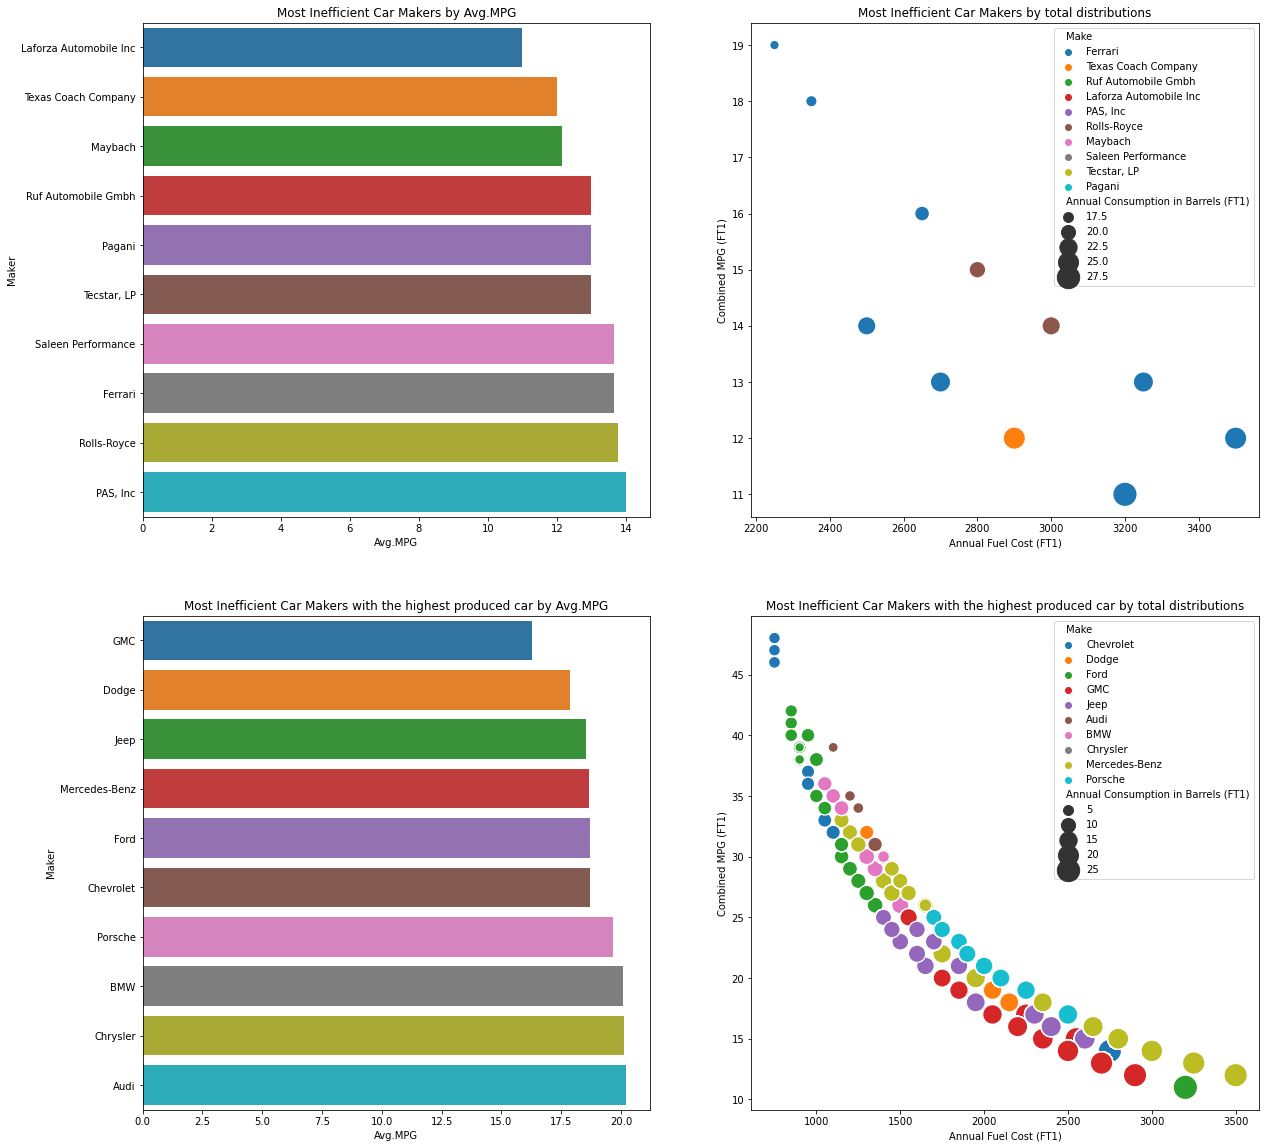

In [971]:
car_eff_plot(True,'Most Inefficient')

Based on above charts:<br>
a. Although in the 1st chart Laforza Automobile it's at the top of the list, but it's not shown in the 2nd chart. This means that this car never consume any petrol yet in the road. we can assume based on the data that this car is just sitting in the Collectors Garage :)<br>

b. Ferrari produced the most inefficient car<br>

c. GMC and Mercedes Benz produced a lot of inefficient car based on the 4th Chart<br>
